分析

In [85]:
import numpy as np
import pandas as pd
from IPython.display import display
%matplotlib inline

In [86]:
#加载行为数据
chunk_size = 1000000
action_data = []


reader = pd.read_csv("./data/action_data.csv", iterator=True)
chunk_loop = True
while chunk_loop:
    try:
        action_data.append(reader.get_chunk(chunk_size))
    except StopIteration:
        chunk_loop = False
        print"Iteration is stopped, load success"
        
action_data = pd.concat(action_data, ignore_index=True)
print action_data.head(5)

Iteration is stopped, load success
   user_id  sku_id                 time  model_id  type  cate  brand
0   266079  138778  2016-01-31 23:59:02        -1     1     8    403
1   266079  138778  2016-01-31 23:59:03         0     6     8    403
2   266079  138778  2016-01-31 23:59:40         0     6     8    403
3   266079  151327  2016-02-01 00:00:12        -1     1     8    403
4   266079  151327  2016-02-01 00:00:13         0     6     8    403


In [19]:
import matplotlib.pyplot as plt
from collections import Counter

查看购买数量与时间的关系

In [45]:
buy_info = action_data[action_data["type"] == 4]
def datetime2date(date):
    return date.strftime('%Y-%m-%d')

buy_date = dict(Counter(buy_info["time"].astype(np.datetime64).apply(datetime2date)))
buy_date = [{item[0]:item[1]} for item in sorted(buy_date.items(), key=lambda d:d[0])]
print buy_date

[{'2016-02-01': 537}, {'2016-02-02': 462}, {'2016-02-03': 356}, {'2016-02-04': 297}, {'2016-02-05': 178}, {'2016-02-06': 134}, {'2016-02-07': 107}, {'2016-02-08': 109}, {'2016-02-09': 127}, {'2016-02-10': 150}, {'2016-02-11': 219}, {'2016-02-12': 243}, {'2016-02-13': 328}, {'2016-02-14': 412}, {'2016-02-15': 488}, {'2016-02-16': 566}, {'2016-02-17': 631}, {'2016-02-18': 497}, {'2016-02-19': 513}, {'2016-02-20': 448}, {'2016-02-21': 401}, {'2016-02-22': 607}, {'2016-02-23': 522}, {'2016-02-24': 495}, {'2016-02-25': 554}, {'2016-02-26': 571}, {'2016-02-27': 515}, {'2016-02-28': 482}, {'2016-02-29': 500}, {'2016-03-01': 1137}, {'2016-03-02': 684}, {'2016-03-03': 634}, {'2016-03-04': 699}, {'2016-03-05': 563}, {'2016-03-06': 587}, {'2016-03-07': 1413}, {'2016-03-08': 750}, {'2016-03-09': 594}, {'2016-03-10': 927}, {'2016-03-11': 813}, {'2016-03-12': 703}, {'2016-03-13': 542}, {'2016-03-14': 1548}, {'2016-03-15': 2827}, {'2016-03-16': 1014}, {'2016-03-17': 552}, {'2016-03-18': 639}, {'2016-

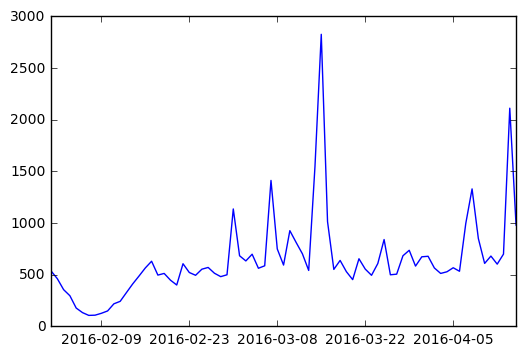

In [92]:
import matplotlib.dates as mdate


fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))
ax.plot_date([item.keys()[0] for item in buy_date],[item.values()[0] for item in buy_date],linestyle="-",marker="None")

除了3月15日受到315维权日的影响，以及4月14日受到活动的影响，一般的购买趋势是比较平缓的。为了需要预测4月16日到4月20日的购买情况，打算考虑10天的浏览、点击、收藏等情况来进行预测；使用数据平缓的3月22日至4月1日的情况来与4月1日到4月6日的购买情况组成训练集，在其中分割出交叉验证集。可以用2月13日到2月28日的数据进行测试